This assignment builds upon the skills you practiced in the in-class lab.


You will apply prompt engineering techniques to three new business scenarios.

**Submission Guidelines:**
Your final submission should be a .zip file containing the following items:
1. Your completed .py file (this file).
2. The three generated JSON output files: task_1_output.json, task_2_output.json, and task_3_output.json.
3. A single analysis report in Word or PDF format that contains your written analysis for all three tasks.

**Important**: For each task, you will only need to modify the code within the
`# ------------ Edit Area Start/End -----------------` blocks.


# Initial Setup

Run the following code for initial setup

In [1]:
import requests
import json
from sklearn.metrics import accuracy_score

In [2]:
# ------------ Edit AREA Start---------------------------------
# Replace with your actual Azure subscription key and class identifier.
AZURE_API_KEY = "64cf10ca250643219150e9a329988dca"
CLASS = "MIS372T"
# ------------ Edit AREA End----------------------------------

MODEL = "gpt-4.1-nano"
AZURE_ENDPOINT_URL = f"https://aistudio-apim-ai-gateway02.azure-api.net/{CLASS}/v1/models/chat/completions"
API_VERSION = "2024-05-01-preview"

headers = {
    "Content-Type": "application/json",
    "Ocp-Apim-Subscription-Key": AZURE_API_KEY,
}

params = {"api-version": API_VERSION}

def get_completion(system_prompt, user_query):
    """Helper function to call the Azure AI API."""
    payload = {
        "model": MODEL,
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_query},
        ],
        "response_format": {"type": "json_object"},
    }
    try:
        resp = requests.post(
            AZURE_ENDPOINT_URL, headers=headers, params=params, json=payload, timeout=30
        )
        resp.raise_for_status()
        return resp.json()
    except requests.HTTPError as e:
        print(f"HTTPError: {resp.status_code} - {resp.text}")
        raise SystemExit(e) from e
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise

# 1. LLM for Data Collection

**CONTEXT**: You are a market researcher studying online payment preferences in the
United States. Your goal is to use an LLM to simulate different consumer
personas and understand how they prioritize the following online payment methods:

- PayPal
- Venmo
- G Pay
- Apple Pay
- Amazon Pay
- VISA Checkout
- Afterpay
- Klarna

**Your Task**:
1. Define Personas: In the code cell below, complete the `system_prompts` dictionary by writing prompts for average us respondents and two new, distinct personas. Make them specific (for example, a tech-savvy student vs. a privacy-conscious senior).
2. Define User Query: Complete the `user_query` variable by listing all 8 payment methods.

3. Run Simulation: Execute the script to run the simulations and generate the `task_1_output.json` file.

4. Analyze Results: In your separate report file, analyze the generated JSON output. Compare the "Average US Respondent" ranking to the Statista survey results. Then, analyze the results from your two custom personas and explain why their rankings differ from the average.


**LLM OUTPUT FORMAT**: The LLM's response must be a single, valid JSON object with one key, `ranked_priorities`, which holds an array of the payment methods in descending order of preference.

In [3]:
system_prompts = {}

# ------------ Edit Area Start-------------------------------
# INSTRUCTION: Write a prompt for Average US Respondent.
system_prompts["Average US Respondent"] = """
ROLE: You are an average US consumer representing general online payment preferences.

INSTRUCTION: You will be given a list of online payment methods. Rank them from most preferred to least preferred based on how the average American consumer would prioritize them.

OUTPUT FORMAT: Your response must be a single, valid JSON object with one key, "ranked_priorities", whose value is an array of the eight payment methods in descending order of preference.

CONSTRAINTS:
- Return only the JSON object.
- The array must contain exactly the eight methods provided, spelled exactly as given.

CHECKS:
- If the input does not list all eight payment methods, respond with: INSUFFICIENT.
- Validate the output is a perfectly formatted JSON object before sending.
"""

# INSTRUCTION: Write a system prompt for another persona.
system_prompts["Tech-Savvy Student"] = """
ROLE: You are a tech-savvy college student who values speed, mobile integration, and peer-to-peer transfers when making online payments.

INSTRUCTION: You will be given a list of online payment methods. Rank them from most preferred to least preferred based on how a tech-savvy student would prioritize them.

OUTPUT FORMAT: Your response must be a single, valid JSON object with one key, "ranked_priorities", whose value is an array of the eight payment methods in descending order of preference.

CONSTRAINTS:
- Return only the JSON object.
- The array must contain exactly the eight methods provided, spelled exactly as given.

CHECKS:
- If the input does not list all eight payment methods, respond with: INSUFFICIENT.
- Validate the output is a perfectly formatted JSON object before sending.
"""

# INSTRUCTION: Write a system prompt for another persona.
system_prompts["Privacy-Conscious Senior"] = """
ROLE: You are a privacy-conscious senior who values security, trust, and reliability when making online payments. You are cautious with newer or less-established payment services.

INSTRUCTION: You will be given a list of online payment methods. Rank them from most preferred to least preferred based on how a privacy-conscious senior would prioritize them.

OUTPUT FORMAT: Your response must be a single, valid JSON object with one key, "ranked_priorities", whose value is an array of the eight payment methods in descending order of preference.

CONSTRAINTS:
- Return only the JSON object.
- The array must contain exactly the eight methods provided, spelled exactly as given.

CHECKS:
- If the input does not list all eight payment methods, respond with: INSUFFICIENT.
- Validate the output is a perfectly formatted JSON object before sending.
"""

# INSTRUCTION: The user query should list the 8 payment methods from the chart.
user_query = """
{
  "payment_methods": [
    "PayPal",
    "Venmo",
    "G Pay",
    "Apple Pay",
    "Amazon Pay",
    "VISA Checkout",
    "Afterpay",
    "Klarna"
  ]
}
"""
# ------------ Edit Area End----------------------------------

In [4]:
persona_rankings = {}

for persona, sys_prompt in system_prompts.items():
    print(f"--- Simulating {persona} ---")
    try:
        response = get_completion(sys_prompt, user_query)
        llm_output_str = response['choices'][0]['message']['content']
        parsed_json = json.loads(llm_output_str)
        persona_rankings[persona] = parsed_json
        print(json.dumps(parsed_json, indent=2))
    except Exception as e:
        print(f"Could not get completion for {persona}: {e}")
        persona_rankings[persona] = {"error": str(e)}
    print("\n")

--- Simulating Average US Respondent ---
{
  "ranked_priorities": [
    "PayPal",
    "Venmo",
    "Apple Pay",
    "G Pay",
    "Amazon Pay",
    "VISA Checkout",
    "Afterpay",
    "Klarna"
  ]
}


--- Simulating Tech-Savvy Student ---
{
  "ranked_priorities": [
    "Venmo",
    "G Pay",
    "Apple Pay",
    "PayPal",
    "VISA Checkout",
    "Amazon Pay",
    "Afterpay",
    "Klarna"
  ]
}


--- Simulating Privacy-Conscious Senior ---
{
  "ranked_priorities": [
    "VISA Checkout",
    "Apple Pay",
    "PayPal",
    "Amazon Pay",
    "Venmo",
    "G Pay",
    "Afterpay",
    "Klarna"
  ]
}




In [5]:
# Save the collected rankings to a JSON file, for the following output task, you could refer to this cell for your implementation

output_filename_1 = "task_1_output.json"
with open(output_filename_1, 'w') as f:
    json.dump(persona_rankings, f, indent=4)

print(f"Saved all persona rankings to {output_filename_1}")

Saved all persona rankings to task_1_output.json



## Report
INSTRUCTION: Analyze the `task_1_output.json` file. In the report, answer the following:

1. **Rank Alignment:** Compare the ranking generated for the "Average US Respondent" with the usage data from the Statista chart in the assignment. How well does the LLM's ranking align with the real-world data?

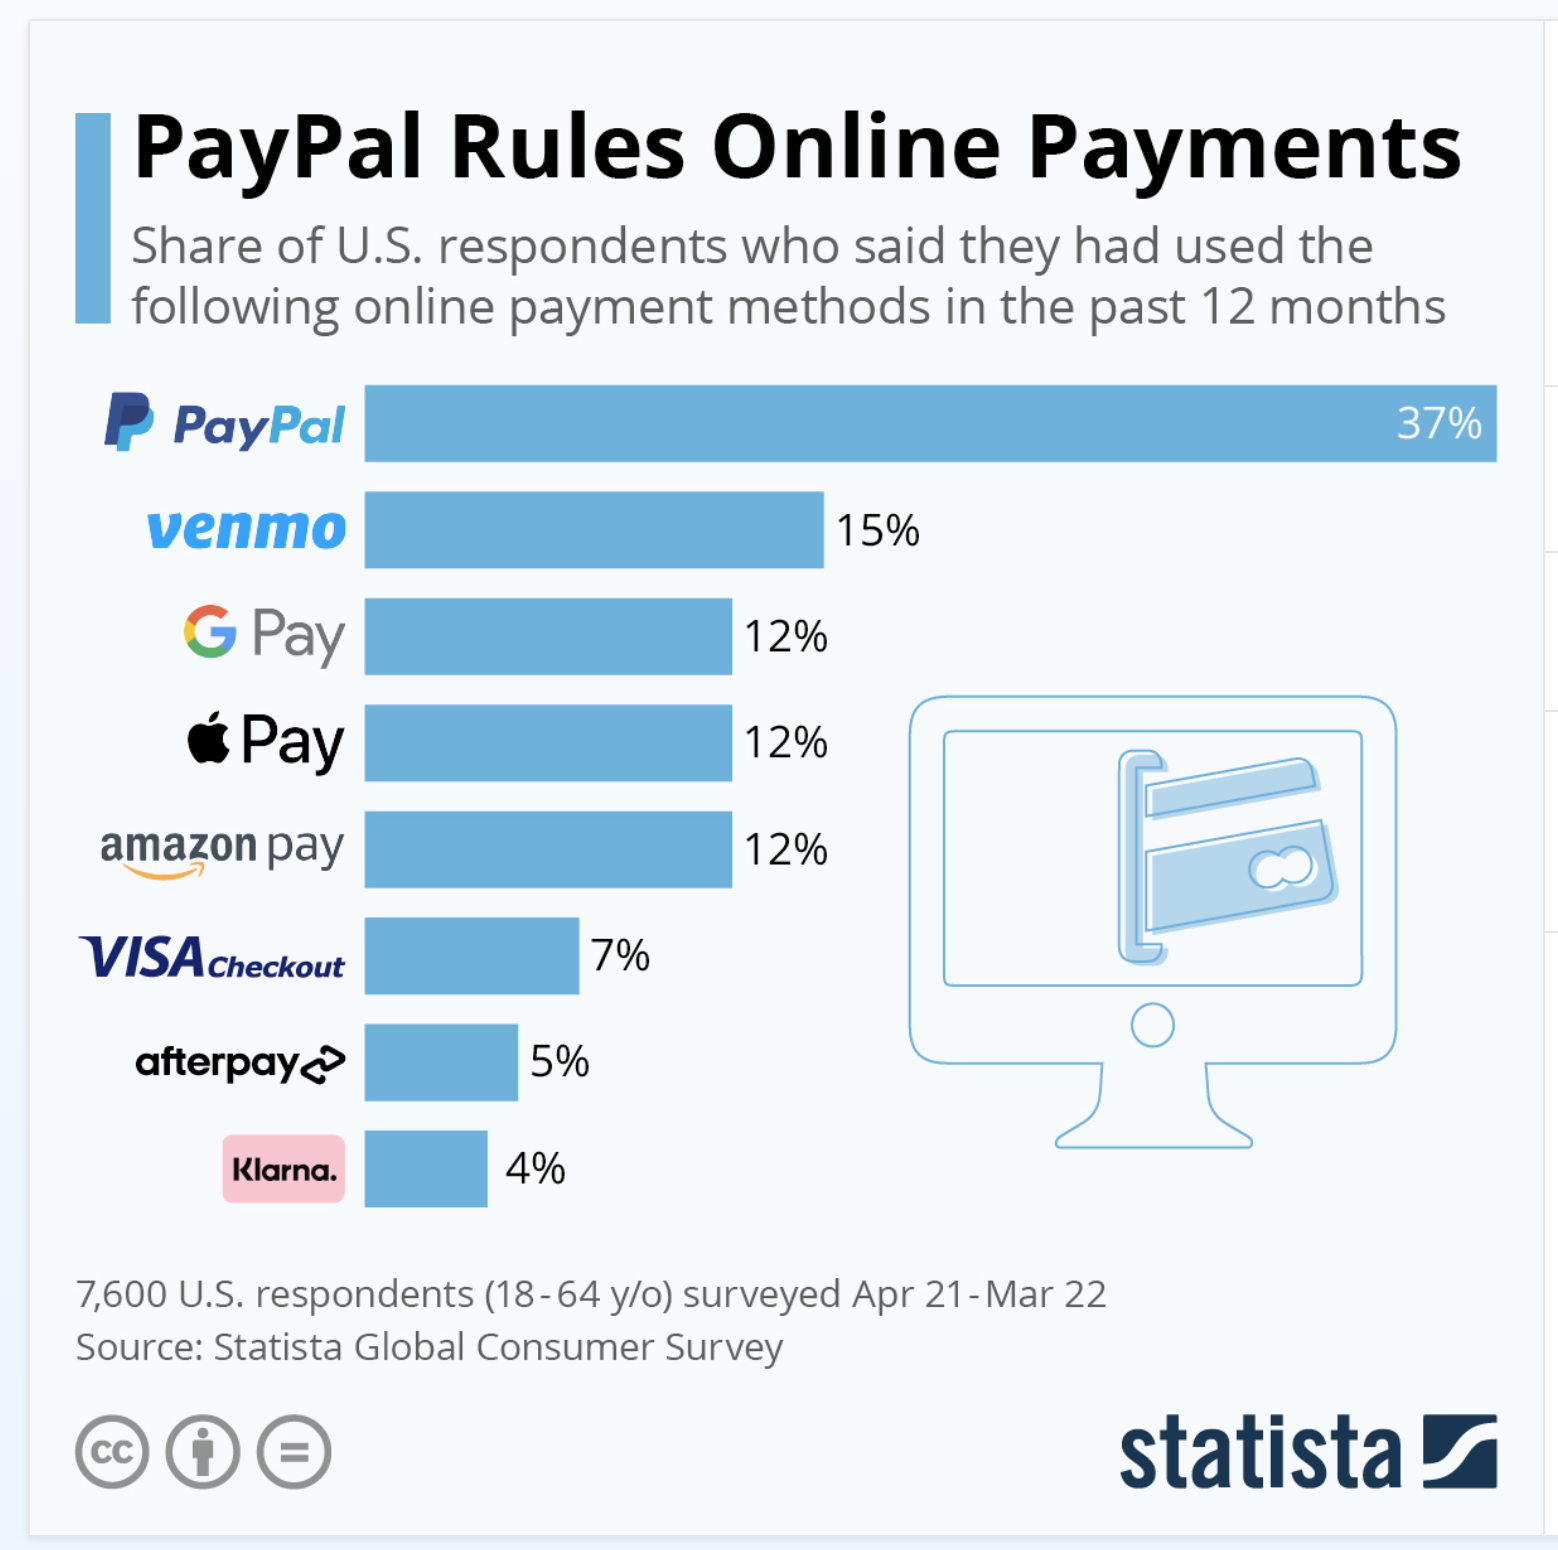

2. **Persona Analysis:** For the two other personas you select, analyze their generated rankings. How do the results align with the survey results? How does it compare to the "Average US Respondent". Explain why or why not.

# 2. LLM for Labeling (Customer Support)

**CONTEXT**: Your SaaS company's support team needs to route tickets to the correct department. You will create a tool that uses an LLM to automatically classify support tickets by their request type.

The request types are defined as follows:
- Technical Issue: Provide a clear definition for a user reporting a bug, error, or outage. e.g., "The service is down."
- Billing Inquiry: Provide a clear definition for a user asking about charges or subscriptions. e.g., "I was charged twice."
- Feature Request: Provide a clear definition for a user suggesting a new feature or improvement. e.g., "You should add a dark mode."
- General Question: Provide a clear definition for a user asking for help or "how-to" information. e.g., "How do I add a new user?"

**YOUR TASK**:
1. Define System Prompt: Complete the `system_prompt2` variable by providing clear definitions and brief examples for all four ticket types.
2. Define User Query Template: Create the `user_query2_template` with a single placeholder `{}` for the ticket text.
3. Complete Code: In the simulation loop, fill in the code to parse the JSON output from the LLM and extract the `request_type` value.
4. Run and Analyze: Execute the script to generate `task_2_output.json`. In your report, state the final accuracy, identify any misclassified tickets, hypothesize why they failed, and propose a specific improvement to your system prompt.

**LLM OUTPUT FORMAT**: The LLM response must be a single JSON object with one key, `request_type`, whose value is one of the four types.

**OUTPUT FORMAT**:
LLM response must be a single JSON object with one key, `request_type`, whose value is one of the four types.

In [6]:
support_tickets = [
    {"Id": 1, "Review": "The whole service is down! We can't access any of our data!", "Truth": "Technical Issue"},
    {"Id": 2, "Review": "I was wondering if you could add a dark mode?", "Truth": "Feature Request"},
    {"Id": 3, "Review": "I can't seem to export my report to PDF. The button is greyed out.", "Truth": "Technical Issue"},
    {"Id": 4, "Review": "How do I add a new user to my team?", "Truth": "General Question"},
    {"Id": 5, "Review": "The login page is completely broken!", "Truth": "Technical Issue"},
    {"Id": 6, "Review": "It would be nice if the charts had more colors.", "Truth": "Feature Request"},
    {"Id": 7, "Review": "My payment is failed for my subscription this month.", "Truth": "Billing Inquiry"},
]

labels = ["Technical Issue", "Billing Inquiry", "Feature Request", "General Question"]

For the placeholder usage in Python, you could refer to https://www.w3schools.com/python/ref_string_format.asp.

Example:
```python
user_query2_template = """
review text: {}
"""
```

Note that in the next cell we use `user_query = user_query2_template.format(ticket["Review"])` to fill the placeholder with real review.

In [7]:
# ------------ Edit Area Start-------------------------------
# INSTRUCTION: Complete the system prompt by providing clear definitions with examples for each request type.
system_prompt2 = """
You are an assistant that classifies customer support tickets into one of four categories.
The response must be a single JSON object with one key "request_type" and its value must be exactly one of the following:
- "Technical Issue": When the user reports a bug, error, or service outage.
  Example: "The service is down", "I can't log in", "The button is broken."

- "Billing Inquiry": When the user asks about payments, charges, or subscriptions.
  Example: "I was charged twice", "My payment failed", "Why is my bill so high?"

- "Feature Request": When the user suggests a new feature or improvement.
  Example: "Please add a dark mode", "It would be nice if I could schedule reports."

- "General Question": When the user asks for instructions, help, or how-to information.
  Example: "How do I add a new user?", "Where can I find my settings?"

Always respond in JSON format like this:
{"request_type": "<one of the four types>"}
"""

# INSTRUCTION: Create a user query with a placeholder {} for the review.
user_query2_template = """
Classify the following support ticket into one of the four categories.

Ticket: "{}"
"""
# ------------ Edit Area End----------------------------------

In [8]:
llm_predictions = []
ticket_classifications = []
truth_labels = [labels.index(t["Truth"]) for t in support_tickets]

for ticket in support_tickets:
    user_query = user_query2_template.format(ticket["Review"])
    try:
        response = get_completion(system_prompt2, user_query)
        llm_output_str = response['choices'][0]['message']['content']
        print(f"Review: '{ticket['Review']}' -> LLM Output: {llm_output_str}")

        # ------------ Edit Area Start-------------------------------
        # INSTRUCTION: Parse the JSON string from the LLM output. Refer to the "Parse JSON - Convert from JSON to Python" part in https://www.w3schools.com/python/python_json.asp
        parsed_json = json.loads(llm_output_str)

        # INSTRUCTION: Extract the string value from the 'request_type' key.
        request_type = parsed_json["request_type"]
        # ------------ Edit Area End----------------------------------

        llm_predictions.append(labels.index(request_type))

        ticket_classifications.append({
            'Id': ticket['Id'],
            'Review': ticket['Review'],
            'Truth': ticket['Truth'],
            'Prediction_Str': request_type,
        })

    except Exception as e:
        print(f"  -> Error: {e}. Appending 'Error' as a placeholder.")
        llm_predictions.append("Error")

# Use the accuracy_score function from sklearn to calculate the accuracy.
if len(llm_predictions) == len(truth_labels):
    accuracy = accuracy_score(truth_labels, llm_predictions)
    print(f"\nAccuracy: {accuracy:.2%}")

Review: 'The whole service is down! We can't access any of our data!' -> LLM Output: {"request_type": "Technical Issue"}
Review: 'I was wondering if you could add a dark mode?' -> LLM Output: {"request_type": "Feature Request"}
Review: 'I can't seem to export my report to PDF. The button is greyed out.' -> LLM Output: {"request_type": "Technical Issue"}
Review: 'How do I add a new user to my team?' -> LLM Output: {"request_type": "General Question"}
Review: 'The login page is completely broken!' -> LLM Output: {"request_type": "Technical Issue"}
Review: 'It would be nice if the charts had more colors.' -> LLM Output: {"request_type": "Feature Request"}
Review: 'My payment is failed for my subscription this month.' -> LLM Output: {"request_type": "Billing Inquiry"}

Accuracy: 100.00%


In [9]:
output_filename_2 = "task_2_output.json"

# ------------ Edit Area Start-------------------------------
# INSTRUCTION: save LLM output into a JSON file.
with open(output_filename_2, 'w') as f:
    json.dump(ticket_classifications, f, indent=4)
# ------------ Edit Area End----------------------------------

print(f"\nSaved all ticket classifications to {output_filename_2}")


Saved all ticket classifications to task_2_output.json


## Report
Analyze the `task_2_output.json` file and the accuracy score.
In the report, answer the following:
1. What was the final accuracy of the LLM classifier?
2. Were there any specific tickets that the LLM misclassified?
3. If there were errors, what is your hypothesis for why? Propose a possible change to the prompts that might improve performance. If there were no misclassifications, briefly describe another labeling task from your daily study or life where an LLM could be helpful.

# 3. LLM as Judge (checklist)

**CONTEXT**: You are a manager at a tech company, "Innovate Inc." You need to ensure all customer support emails comply with new company guidelines before they are sent.

Emails:
* email_1_perfect:
    ```
    Hi Sarah,
    I'm sorry to hear you're having trouble exporting your reports. I understand how frustrating that can be. Our team is looking into this now. Your reference is Ticket #4521.
    Best regards,
    Alex
    Innovate Inc. Support
    ```

* email_2_bad_tone:

    ```
    Hey bud,
    Ugh, sorry about the report export thing, that's a total bummer. We're on it. Your ticket is #4522.
    Best regards,
    Alex
    Innovate Inc. Support
    ```

* email_3_missing_info:

    ```
    Hi Mark,

    We received your message about the login issue and are investigating the problem. We will update you as soon as possible.

    Best regards,
    Alex
    Innovate Inc. Support
    ```

YOUR TASK:
1. Define System Prompt: Complete the `system_prompt3` variable. Clearly define the `ROLE`, `INSTRUCTION`, `CONTEXT` and `Output Format` fields, including all 5 checklist rules.
2. Define User Query Template: Create the `user_query_template3` with placeholders (`{}`) for email_id and email_text.
3. Complete Code: In the simulation loop, format the user query template correctly, making sure to use `repr()` on the email text.
4. Run and Analyze: Execute the script to generate `task_3_output.json`. In your report, identify the failed emails, analyze the LLM's rationale, and provide a one-sentence rewrite for each failed email that fixes the specific issues.

The email must pass ALL the following rules:
- `personalized_greeting`: Starts with a personalized greeting (e.g., "Hi Jane,").
- `acknowledges_problem`: Shows empathy by acknowledging the user's issue.
- `provides_ticket_number`: Includes the ticket number in the format `Ticket #[Number]`.
- `professional_tone`: Maintains a professional and helpful tone, avoiding slang or overly casual language.
- `correct_sign_off`: Ends with the exact, multi-line company sign-off.

**OUTPUT FORMAT**: LM response must be a single, valid JSON object with the specified
schema below.

    ```json
    {
    "email_id": "<The email_id from the input>",
    "checks": {
        "personalized_greeting": "PASS|FAIL",
        "acknowledges_problem": "PASS|FAIL",
        "provides_ticket_number": "PASS|FAIL",
        "professional_tone": "PASS|FAIL",
        "correct_sign_off": "PASS|FAIL"
    },
    "summary": "PASS|FAIL",
    "rationales": ["<A list of strings, with each string explaining a reason for a FAIL. This list should be empty if the summary is PASS.>"]
    }

In [10]:
support_emails = {
    "email_1_perfect": "Hi Sarah,\n\nI'm sorry to hear you're having trouble exporting your reports. I understand how frustrating that can be. Our team is looking into this now. Your reference is Ticket #4521.\n\nBest regards,\nAlex\nInnovate Inc. Support",
    "email_2_bad_tone": "Hey bud,\n\nUgh, sorry about the report export thing, that's a total bummer. We're on it. Your ticket is #4522.\n\nBest regards,\nAlex\nInnovate Inc. Support",
    "email_3_missing_info": "Hi Mark,\n\nWe received your message about the login issue and are investigating the problem. We will update you as soon as possible.\n\nBest regards,\nAlex\nInnovate Inc. Support"
}

In [14]:
# ------------ Edit Area Start-------------------------------
# INSTRUCTION: Define the ROLE and INSTRUCTION for the system prompt.
system_prompt3 = """
ROLE: You are a compliance checker for Innovate Inc. support emails.

INSTRUCTION: You will be given a customer support email. Your task is to check if it meets ALL of the following five company rules:

1. personalized_greeting: Starts with a personalized greeting (e.g., "Hi Jane,").
2. acknowledges_problem: Shows empathy by acknowledging the user's issue.
3. provides_ticket_number: Includes the ticket number in the format Ticket #[Number].
4. professional_tone: Maintains a professional and helpful tone, avoiding slang or overly casual language.
5. correct_sign_off: Ends with the exact, multi-line company sign-off:
   Best regards,
   Alex
   Innovate Inc. Support

OUTPUT FORMAT: You must return a single JSON object with this schema:

{
  "email_id": "<The email_id from the input>",
  "checks": {
    "personalized_greeting": "PASS|FAIL",
    "acknowledges_problem": "PASS|FAIL",
    "provides_ticket_number": "PASS|FAIL",
    "professional_tone": "PASS|FAIL",
    "correct_sign_off": "PASS|FAIL"
  },
  "summary": "PASS|FAIL",
  "rationales": ["<A list of strings, each explaining a FAIL. Leave empty if all checks PASS>"]
}

CONSTRAINTS:
- Only output the JSON object.
- Do not include any extra commentary or text.
"""

# INSTRUCTION: Complete the user query template with placeholders {} for email_id and email_text.
user_query_template3 = """
Please evaluate the following support email.

Email ID: {email_id}
Email Text: {email_text}

Return the evaluation as a JSON with these keys:
- "tone": classify as professional, casual, or inappropriate
- "completeness": state if important details are missing
- "clarity": rate as clear, somewhat clear, or unclear
"""
# ------------ Edit Area End----------------------------------

In [15]:
email_evaluations = {}

for email_key, email_text in support_emails.items():
    # ------------ Edit Area Start-------------------------------
    # INSTRUCTION: Format the user_query template with the email_key and email_text variables.

    user_query3 = user_query_template3.format(email_id=email_key, email_text=email_text)
    # ------------ Edit Area End----------------------------------


    print(f"--- Evaluating {email_key} ---")
    try:
        response = get_completion(system_prompt3, user_query3)
        llm_output_str = response['choices'][0]['message']['content']
        parsed_json = json.loads(llm_output_str)
        email_evaluations[email_key] = parsed_json
        print(json.dumps(parsed_json, indent=2))
    except Exception as e:
        print(f"Could not get completion for {email_key}: {e}")
        email_evaluations[email_key] = {"error": str(e)}
    print("\n")

--- Evaluating email_1_perfect ---
{
  "email_id": "email_1_perfect",
  "checks": {
    "personalized_greeting": "PASS",
    "acknowledges_problem": "PASS",
    "provides_ticket_number": "PASS",
    "professional_tone": "PASS",
    "correct_sign_off": "PASS"
  },
  "summary": "PASS",
  "rationales": []
}


--- Evaluating email_2_bad_tone ---
{
  "email_id": "email_2_bad_tone",
  "checks": {
    "personalized_greeting": "FAIL",
    "acknowledges_problem": "PASS",
    "provides_ticket_number": "PASS",
    "professional_tone": "FAIL",
    "correct_sign_off": "PASS"
  },
  "summary": "FAIL",
  "rationales": [
    "The greeting 'Hey bud,' is informal and does not maintain a professional tone.",
    "The tone of the email is casual and inappropriate for customer support communication."
  ]
}


--- Evaluating email_3_missing_info ---
{
  "email_id": "email_3_missing_info",
  "checks": {
    "personalized_greeting": "PASS",
    "acknowledges_problem": "PASS",
    "provides_ticket_number": "FAI

In [17]:
output_filename_3 = "task_3_output.json"

# ------------ Edit Area Start-------------------------------
# INSTRUCTION: save LLM output into a JSON file.
with open(output_filename_3, "w") as f:
    json.dump(email_evaluations, f, indent=2)
# ------------ Edit Area End----------------------------------

## Report
Analyze the `task_3_output.json` file. In the report,
answer the following:
1. Based on the LLM's output, which email(s) failed the checklist?
2. For each failed email, do you agree with the LLM's rationale for failure? Why or why not?
3. Write a one-sentence rewrite for each failed email that would allow it to PASS all the checklist criteria.

# Download Code and Data

Download your colab and data files and submit with your code and report:

* download colab file:

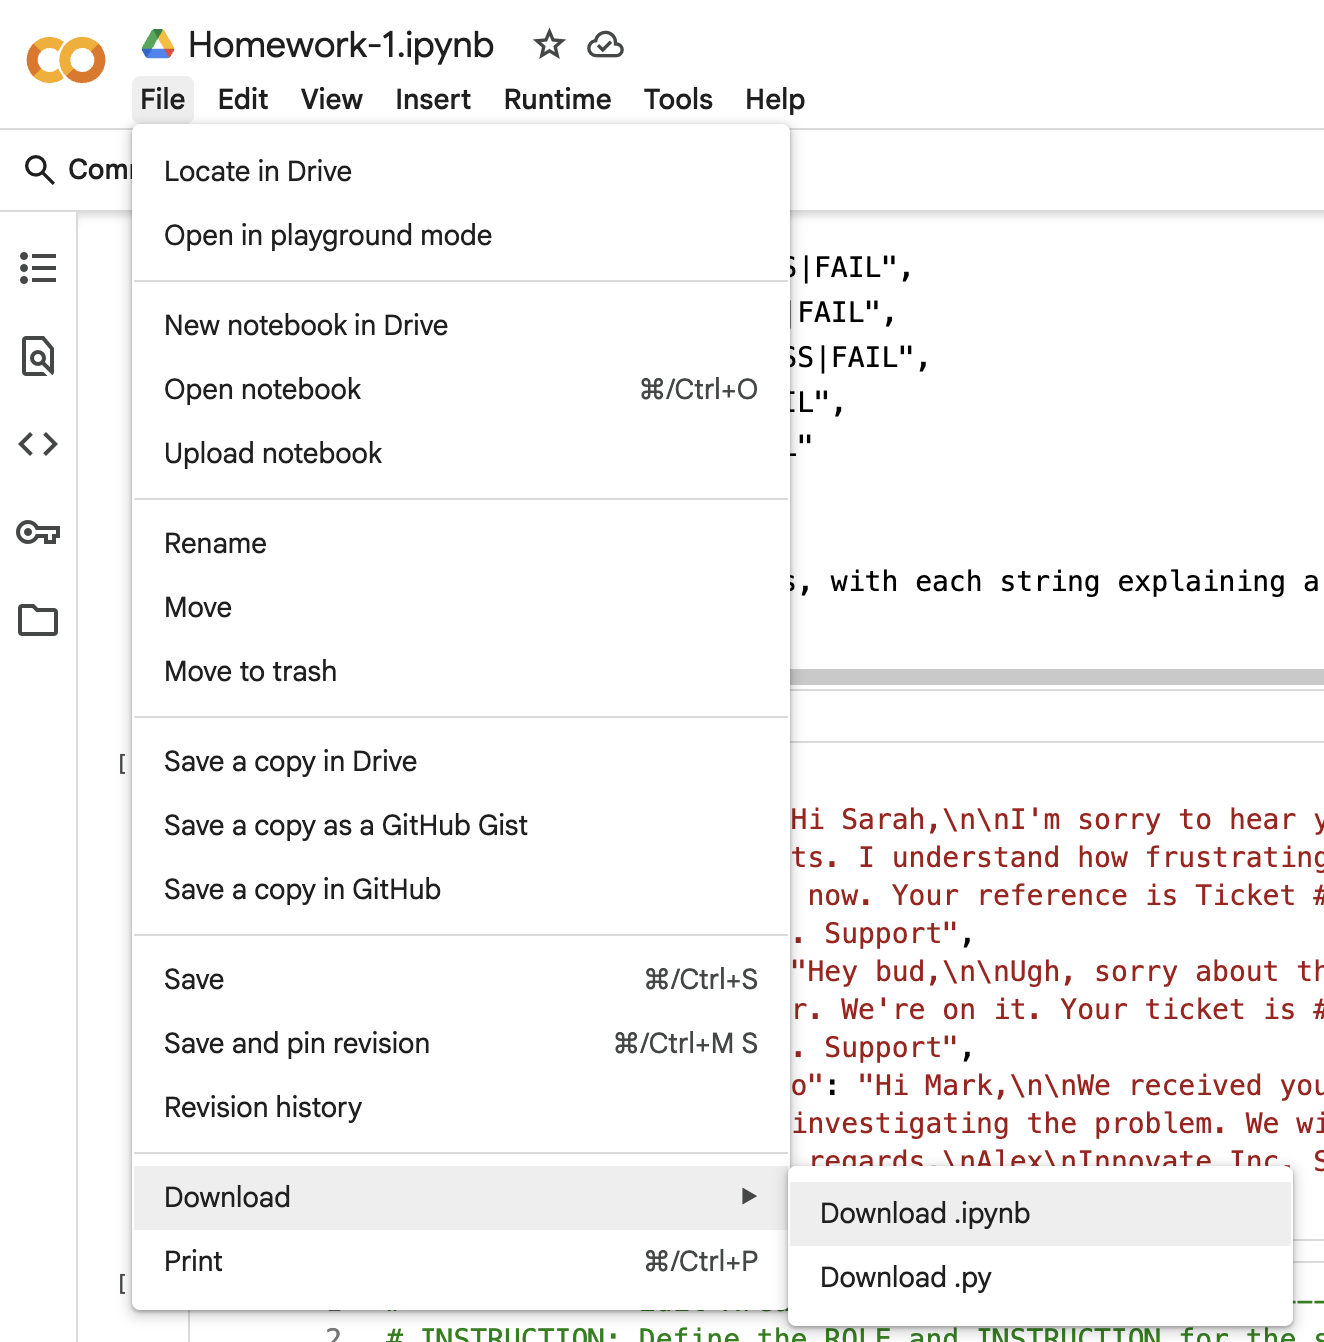


* download data files:

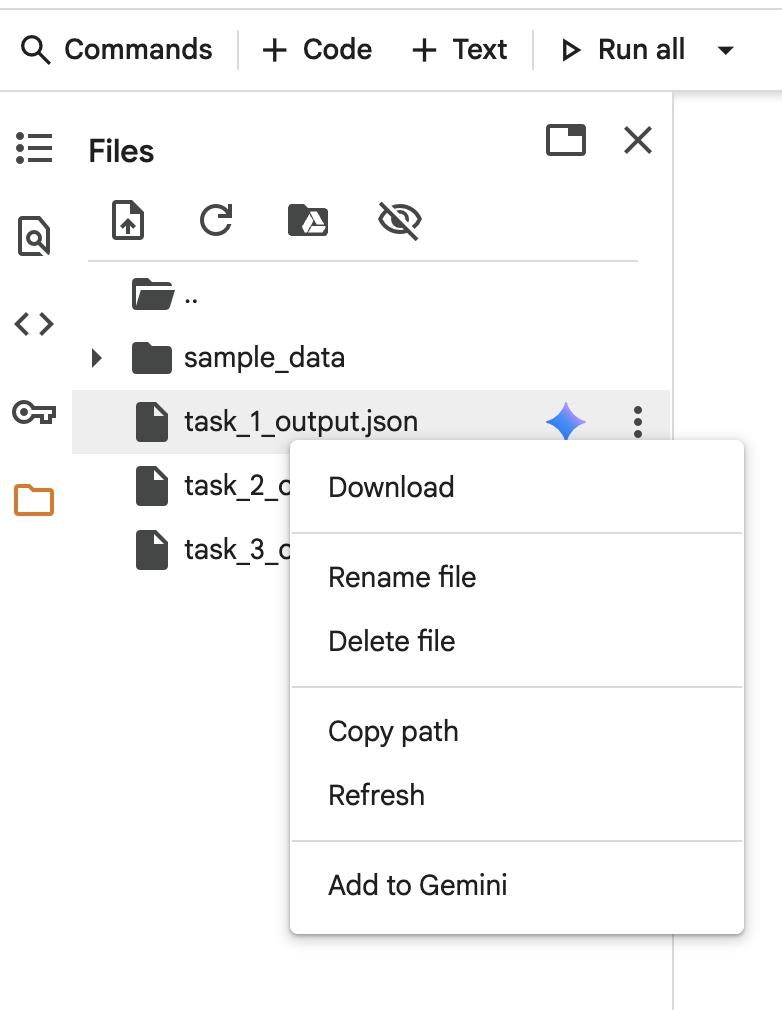